最优解： 1.2652999957035185
最优值： 1.2962451579223764


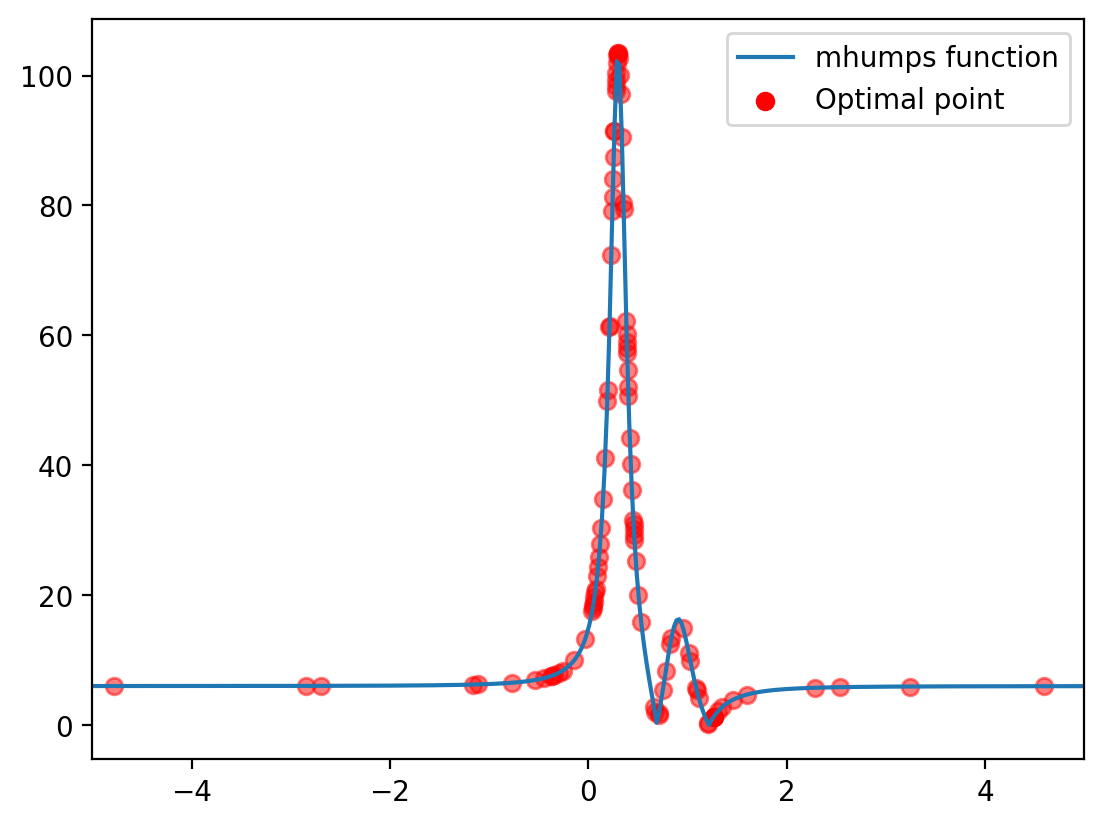

最优解： [0.96847765 0.96847765]
最优值： 3.5744518772576797


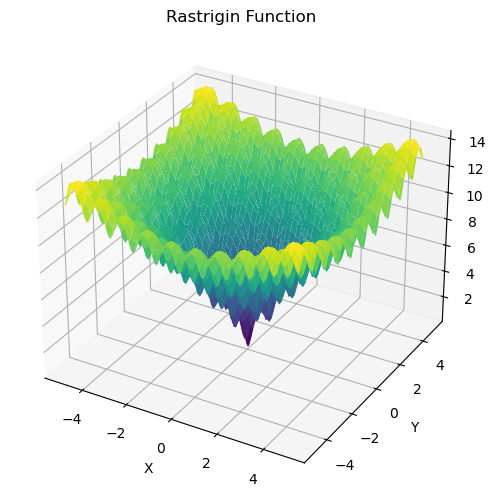

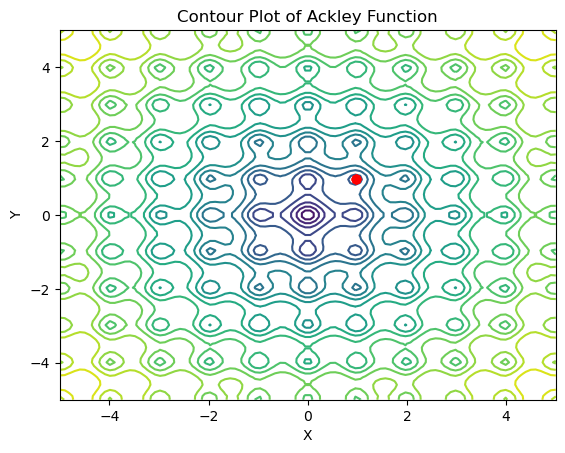

最优解： [0.99495864 0.99495864]
最优值： 1.9899181141865832


<Figure size 640x480 with 0 Axes>

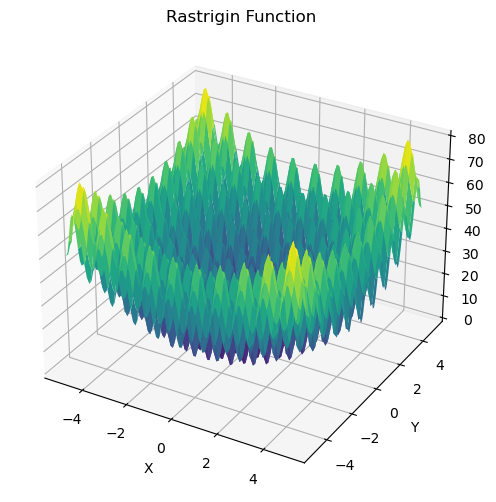

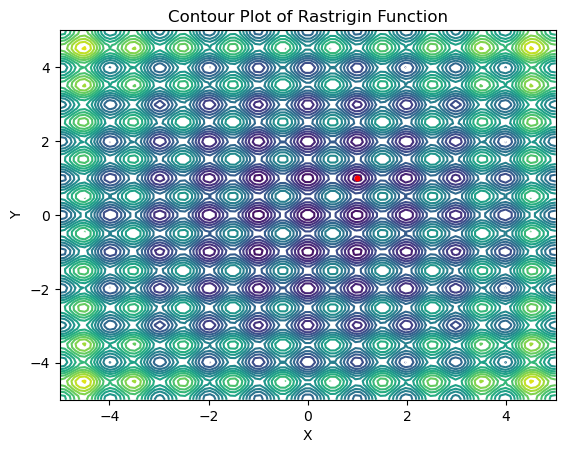

<Figure size 640x480 with 0 Axes>

In [3]:
# 引入所需的库
import numpy as np
import matplotlib.pyplot as plt

# 定义优化的函数
def mhumps(x):
    return abs(-1 / ((x - 0.3) ** 2 + 0.01) + 1 / ((x - 0.9) ** 2 + 0.04) - 6)

# 定义函数的一阶导数
def mhumps_prime(x):
    return (2 * (0.3 - x) / ((x - 0.3) ** 2 + 0.01) ** 2) - (2 * (0.9 - x) / ((x - 0.9) ** 2 + 0.04) ** 2)

# 定义函数的二阶导数
def mhumps_double_prime(x):
    return (2 * ((0.9 - x) ** 2 - 0.04) / ((x - 0.9) ** 2 + 0.04) ** 3) - (2 * ((0.3 - x) ** 2 - 0.01) / ((x - 0.3) ** 2 + 0.01) ** 3)

# 定义牛顿法优化函数
def opt(f, f_prime, f_double_prime, x0, max_iter=100, tol=1e-6):
    # 初始化参数
    x = x0
    f_val = f(x)
    f_prime_val = f_prime(x)
    f_double_prime_val = f_double_prime(x)

    # 初始化计数器和历史记录列表
    iter_count = 0
    x_history = []
    f_history = []

    # 迭代优化，直到满足收敛条件
    while abs(f_prime_val) > tol and iter_count < max_iter:
        # 更新x值
        x -= f_prime_val / f_double_prime_val
        # 更新函数值和导数值
        f_val = f(x)
        f_prime_val = f_prime(x)
        f_double_prime_val = f_double_prime(x)

        # 记录x和函数值
        x_history.append(x)
        f_history.append(f_val)

        # 更新计数器
        iter_count += 1

    # 返回最优解、最优值和历史记录
    return x, f_val, x_history, f_history

# 运行优化算法
x_opt, f_opt, x_history, f_history = opt(mhumps, mhumps_prime, mhumps_double_prime, 0.99)

# 打印最优解和最优值
print("最优解：", x_opt)
print("最优值：", f_opt)

# 绘制函数图像和最优解
x = np.linspace(-5, 5, 400)
y = mhumps(x)

plt.figure(dpi=200)
plt.plot(x, y, '-', label='mhumps function')
plt.scatter(x_opt, f_opt, c='red', label='Optimal point')

# 绘制优化过程中的最优点
for i in range(len(x_history)):
    plt.scatter(x_history[i], f_history[i], c='red', alpha=0.5)

plt.legend()

plt.xlim(-5, 5)  # 设置x轴的范围
plt.show()  # 显示图像

#函数2
# 定义函数
def ackley(x, y):
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x ** 2 + y ** 2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.exp(1) + 20

# 定义一阶导数
def ackley_prime(x, y):
    delta = 0.0001
    dx = (ackley(x + delta, y) - ackley(x - delta, y)) / (2 * delta)
    dy = (ackley(x, y + delta) - ackley(x, y - delta)) / (2 * delta)
    return np.array([dx, dy])

# 定义二阶导数，返回Hessian矩阵
def ackley_double_prime(x, y):
    delta = 0.0001
    dxx = (ackley(x + delta, y) - 2 * ackley(x, y) + ackley(x - delta, y)) / (delta ** 2)
    dyy = (ackley(x, y + delta) - 2 * ackley(x, y) + ackley(x, y - delta)) / (delta ** 2)
    dxy = (ackley(x + delta, y + delta) - ackley(x + delta, y - delta) - ackley(x - delta, y + delta) + ackley(x - delta, y - delta)) / (4 * delta ** 2)
    return np.array([[dxx, dxy], [dxy, dyy]])

# 定义牛顿法优化函数
def opt(f, f_prime, f_double_prime, x0, max_iter=100, tol=1e-6):
    x = x0
    x_history = [x]  # 记录每次迭代的最优点位置
    for _ in range(max_iter):
        grad = f_prime(*x)
        if np.sqrt(np.sum(grad ** 2)) < tol:
            break
        hess = f_double_prime(*x)
        x -= np.linalg.inv(hess).dot(grad)
        x_history.append(x)  # 记录每次迭代的最优点位置
    return x, x_history

# 运行优化算法
x_opt, x_history = opt(ackley, ackley_prime, ackley_double_prime, np.array([1.0, 1.0]))

# 打印最优解
print("最优解：", x_opt)
print("最优值：", ackley(*x_opt))

# 创建网格点
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = ackley(X, Y)

# 绘制三维图像
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rastrigin Function')
plt.show()
plt.savefig("ackley1.png")
# 绘制等高线图和最优点位置
plt.contour(X, Y, Z, levels=20)
plt.plot(*zip(*x_history), 'ro-')  # 绘制最优点位置
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of Ackley Function')
plt.show()
plt.savefig("ackley2.png")

#函数3

# 定义函数
def rastrigin(x, y):
    return 20 + x ** 2 - 10 * np.cos(2 * np.pi * x) + y ** 2 - 10 * np.cos(2 * np.pi * y)

# 定义一阶导数
def rastrigin_prime(x, y):
    return np.array([2 * x + 20 * np.pi * np.sin(2 * np.pi * x),
                     2 * y + 20 * np.pi * np.sin(2 * np.pi * y)])

# 定义二阶导数，返回Hessian矩阵
def rastrigin_double_prime(x, y):
    return np.array([[2 + 40 * np.pi ** 2 * np.cos(2 * np.pi * x), 0],
                     [0, 2 + 40 * np.pi ** 2 * np.cos(2 * np.pi * y)]])

# 定义牛顿法优化函数
def opt(f, f_prime, f_double_prime, x0, max_iter=10000, tol=1e-6):
    x = x0
    x_history = [x]  # 记录每次迭代的最优点位置
    for _ in range(max_iter):
        grad = f_prime(*x)
        if np.sqrt(np.sum(grad ** 2)) < tol:
            break
        hess = f_double_prime(*x)
        x -= np.linalg.inv(hess).dot(grad)
        x_history.append(x)  # 记录每次迭代的最优点位置
    return x, x_history

# 运行优化算法
x_opt, x_history = opt(rastrigin, rastrigin_prime, rastrigin_double_prime, np.array([1.0, 1.0]))

# 打印最优解
print("最优解：", x_opt)
print("最优值：", rastrigin(*x_opt))

# 创建网格点
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

# 绘制三维图像
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.plot(*zip(*x_history), 'ro-')  # 绘制最优点位置
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rastrigin Function')
plt.show()
plt.savefig("rastrigin1.png")
# 绘制等高线图和最优点位置
plt.contour(X, Y, Z, levels=20)
plt.plot(*zip(*x_history), 'ro-', markersize=3, linewidth=1)  # 绘制最优点位置
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of Rastrigin Function')
plt.show()
plt.savefig("rastrigin2.png")